In [1]:
import pandas as pd

df_pred= pd.read_csv('labeled_ions_team_name_1.csv', sep = ';', index_col = [0])

import imageio.v3 as iio
from matplotlib import pyplot as plt

In [2]:
for column in df_pred.columns:
    if pd.api.types.is_numeric_dtype(df_pred[column]):
        df_pred[column] = df_pred.astype({column: int})[column]

In [3]:
df_pred

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,760e3945-e0c9-4c9a-b78a-a68fbbee05cd.png,0,1,1,1
1,bc09db3b-dedf-49da-946c-efdf2304551b.png,1,0,1,1
2,45da543d-c099-4e17-9e18-f3c2776ae8b7.png,0,1,1,1
3,fbe18a1d-a194-4581-ad61-8aff1dcf045d.png,1,0,1,1
4,ccb1fa64-1a46-4680-82e3-178495a9121c.png,1,1,0,1
5,2067c2f1-a36b-4892-b96e-43028b0fea2d.png,1,1,1,1
6,687e714c-d32b-4c6b-9e26-d9dea275bccd.png,1,1,1,1
7,1813bf7c-24cc-4af0-a032-b70cfa74fbfa.png,1,0,1,1
8,7fd7c561-7522-46aa-b95b-9b66353eb63c.png,1,1,1,1
9,0f1ef869-4992-4a1a-af0d-9ed7dbc8d0fc.png,1,1,0,1


Qubit 1 state    0
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 0, dtype: object


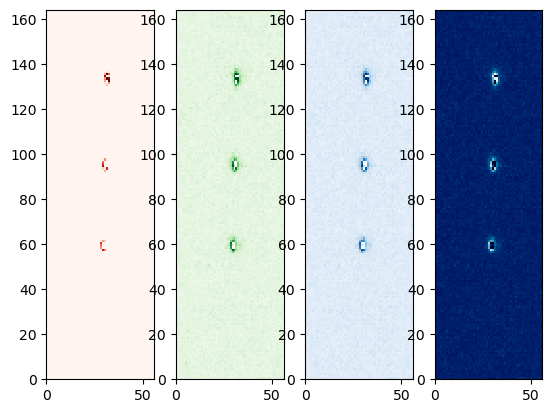

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 1, dtype: object


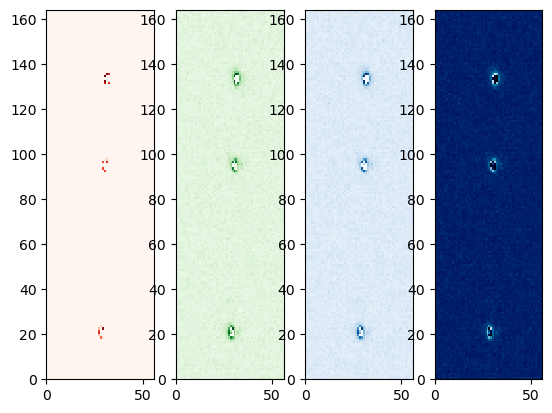

Qubit 1 state    0
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 2, dtype: object


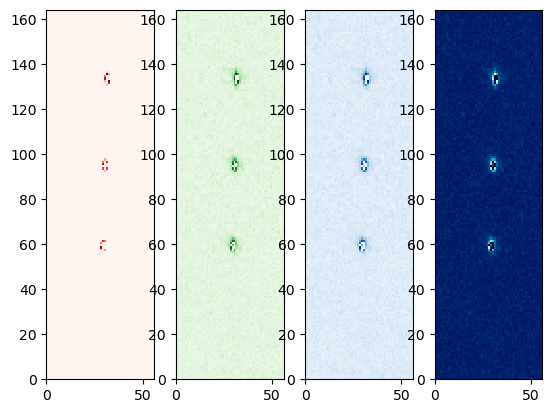

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 3, dtype: object


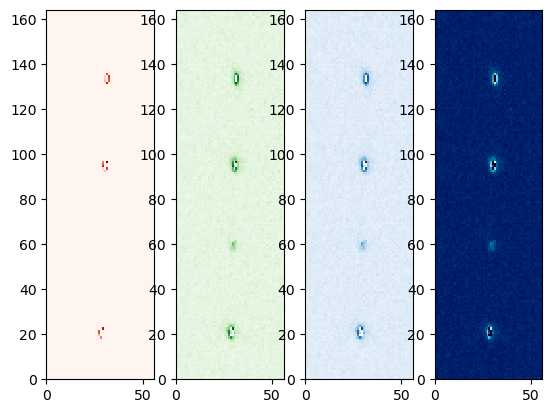

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    1
Name: 4, dtype: object


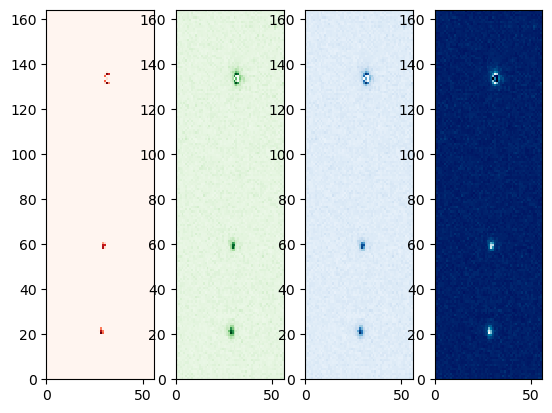

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 5, dtype: object


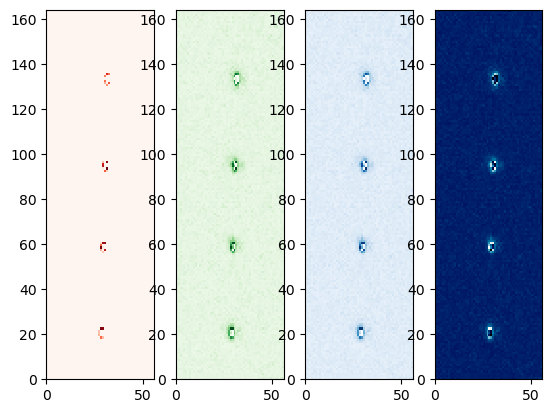

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 6, dtype: object


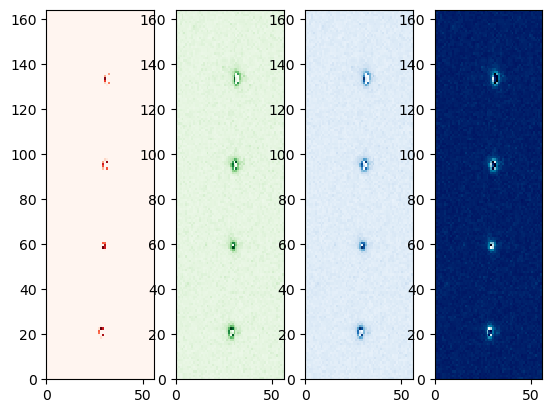

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 7, dtype: object


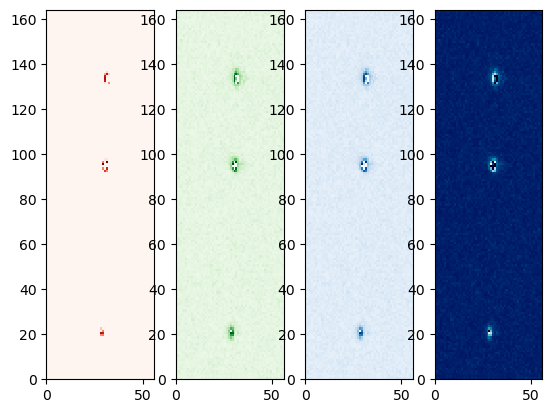

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 8, dtype: object


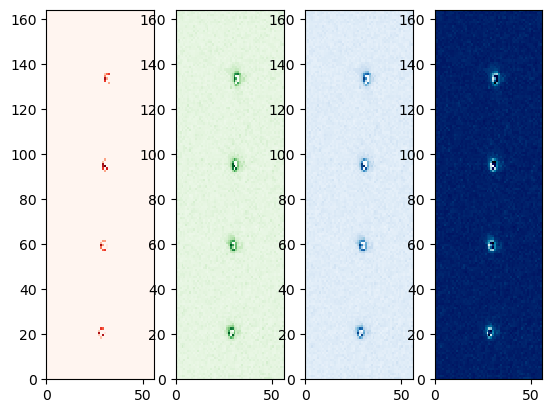

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    1
Name: 9, dtype: object


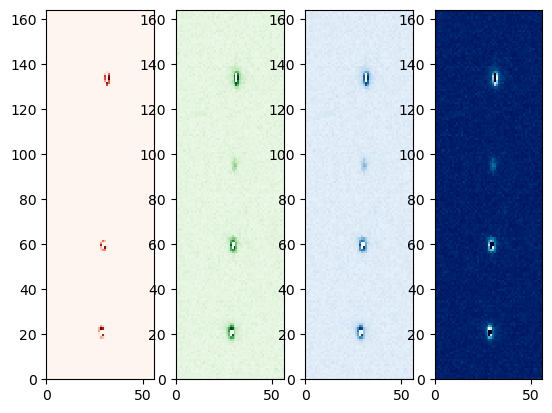

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    0
Name: 10, dtype: object


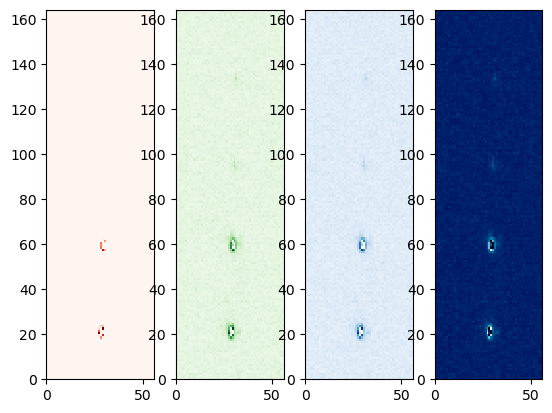

In [4]:
root = "./Входные данные/"
from IPython.display import Image, display
for index, row in df_pred.iterrows():
    im = iio.imread(root + row.Filename)
    
    print(row[1:5])
    fig, ax = plt.subplots(nrows=1, ncols=4)
    ax[0].pcolormesh(im[:, :, 0], cmap="Reds")
    ax[1].pcolormesh(im[:, :, 1], cmap="Greens")
    ax[2].pcolormesh(im[:, :, 1], cmap="Blues")
    ax[3].pcolormesh(im)
    plt.show()

In [5]:
df_single = pd.DataFrame()

# Состояния

# Позиции ионов

In [6]:
import glob
import numpy as np

In [7]:
all_ions_im = None
for im_path in glob.glob(root + "*.png"):
    im = iio.imread(im_path)
    # all_ions_im = np.maximum(all_ions_im, im)
    try:
        # all_ions_im = np.maximum(all_ions_im, im)
        all_ions_im = all_ions_im + im
    except TypeError:
        all_ions_im = im

In [8]:
all_ions_im.shape

(164, 56, 3)

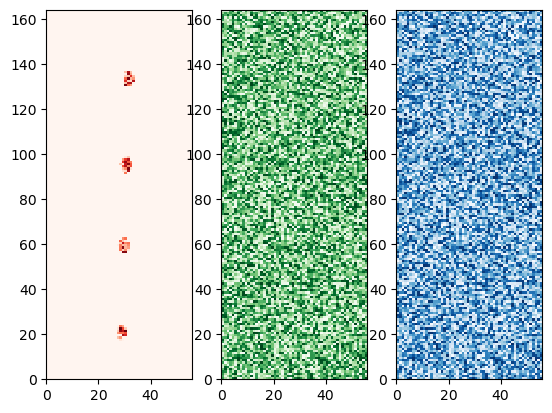

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].pcolormesh(all_ions_im[:, :, 0], cmap="Reds")
ax[1].pcolormesh(all_ions_im[:, :, 1], cmap="Greens")
ax[2].pcolormesh(all_ions_im[:, :, 1], cmap="Blues")

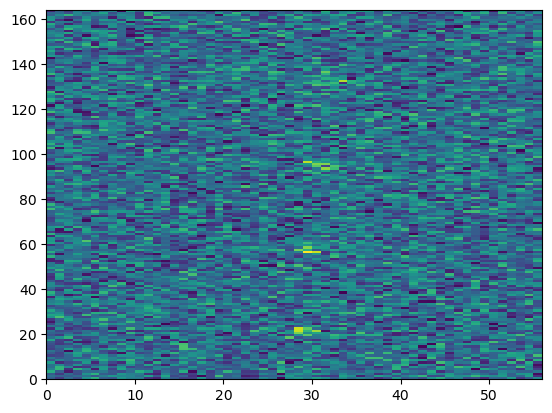

In [10]:
plt.pcolormesh(np.sum(all_ions_im, axis=2))

(56, 3)
(164, 3)


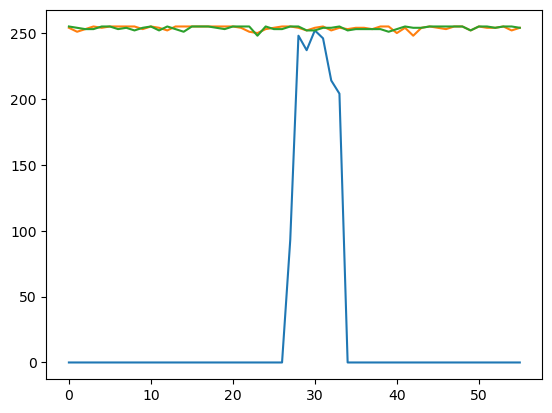

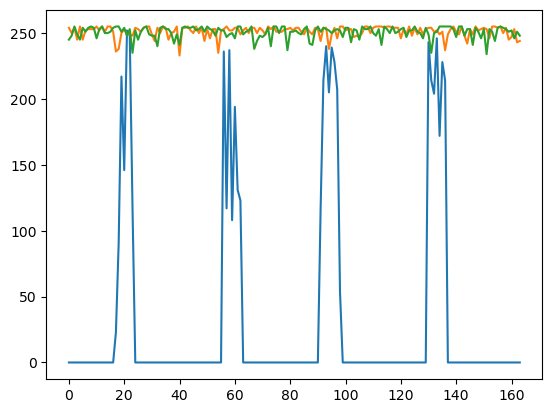

In [11]:
all_im_x = np.max(all_ions_im, axis=0)
print(all_im_x.shape)
all_im_y = np.max(all_ions_im, axis=1)
print(all_im_y.shape)
plt.plot(all_im_x)
plt.show()
plt.plot(all_im_y)
plt.show()

In [12]:
x_position = np.where(all_im_x[:, 0] > 0)

In [13]:
y_position = np.asarray(np.where(all_im_y[:, 0] > 0))

In [14]:
all_im_y[98, 0]

54

In [17]:
%matplotlib inline
plt.plot(all_im_y[:, 0])

In [16]:
y_position = 
[17,  18,  19,  20,  21,  22,  23]
[56,  57,  58,  59,  60,  61,  62]
[91,  92,  93,  94,  95,  96,  97,  98]
[130, 131, 132, 133, 134, 135, 136]

SyntaxError: invalid syntax (1459793744.py, line 1)

In [18]:
x_centers = [28, 29, 30, 31]
y_centers = [20, 59, 94, 133]
x_span = 3
y_span = 4

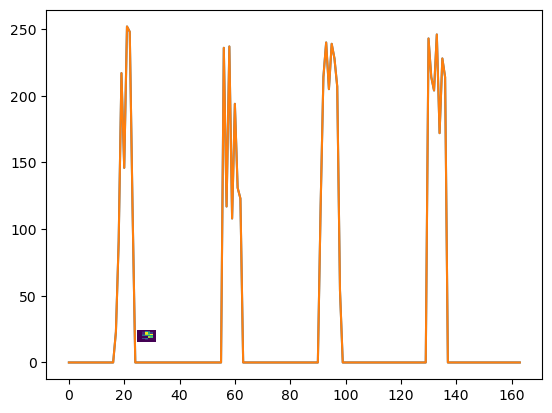

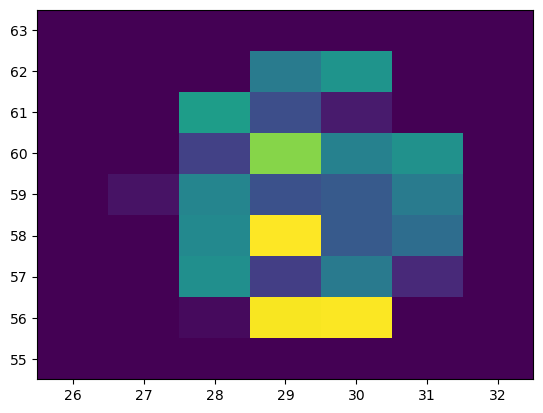

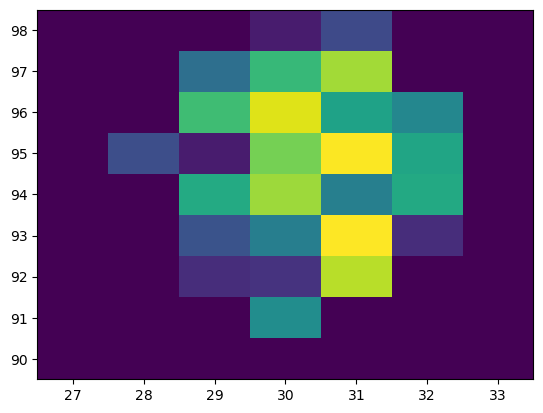

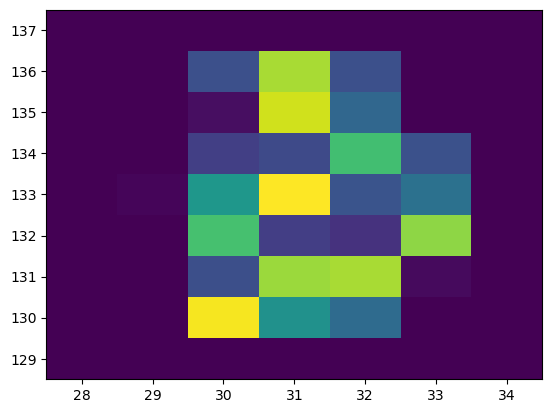

In [19]:
im = all_ions_im
for i in range(4):
    x_center = x_centers[i]
    y_center = y_centers[i]
    x_list = np.arange(x_center-x_span, x_center + x_span+1)
    y_list = np.arange(y_center-y_span, y_center + y_span+1)
    xx, yy = np.meshgrid(x_list, y_list)
    im_single = im[y_center-y_span:y_center + y_span+1, x_center-x_span:x_center + x_span+1]
    plt.pcolormesh(xx, yy, im_single[:, :, 0])
    plt.show()

# Состояния

In [55]:
state_list = [[], []]

root = "./Входные данные/"
for index, row in df_pred.iterrows():
    im = iio.imread(root + row.Filename)
    for i in range(4):
        x_center = x_centers[i]
        y_center = y_centers[i]
        x_list = np.arange(x_center-x_span, x_center + x_span+1)
        y_list = np.arange(y_center-y_span, y_center + y_span+1)
        xx, yy = np.meshgrid(x_list, y_list)
        
        im_single = im[y_center-y_span:y_center + y_span+1, x_center-x_span:x_center + x_span+1]
        
        state = int(row[i+1])
        
        state_list[state].append(im_single)

#         print("State: ", state)
        
#         fig, ax = plt.subplots(nrows=1, ncols=3)
#         ax[0].pcolormesh(im_single[:, :, 0], cmap="Reds")
#         ax[1].pcolormesh(im_single[:, :, 1], cmap="Greens")
#         ax[2].pcolormesh(im_single[:, :, 1], cmap="Blues")
#         plt.show()

for state in [0, 1]:
    state_list[state] = np.asarray(state_list[state])
        

In [21]:
def plot_image(image):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].pcolormesh(image[:, :, 0], cmap="Reds")
    ax[1].pcolormesh(image[:, :, 1], cmap="Greens")
    ax[2].pcolormesh(image[:, :, 1], cmap="Blues")
    plt.show()

## Нули

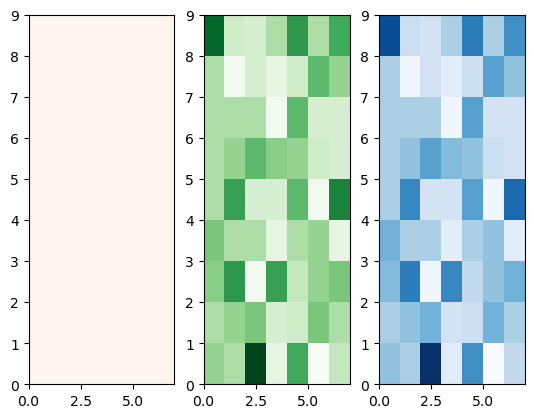

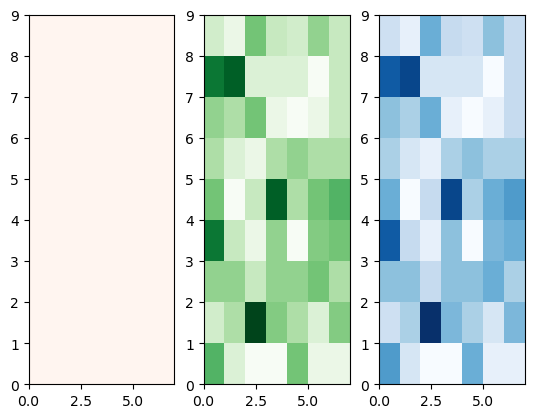

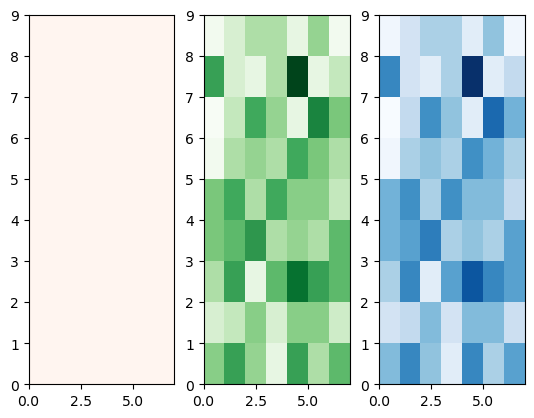

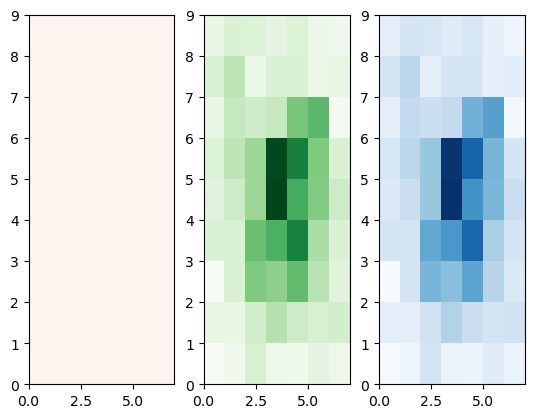

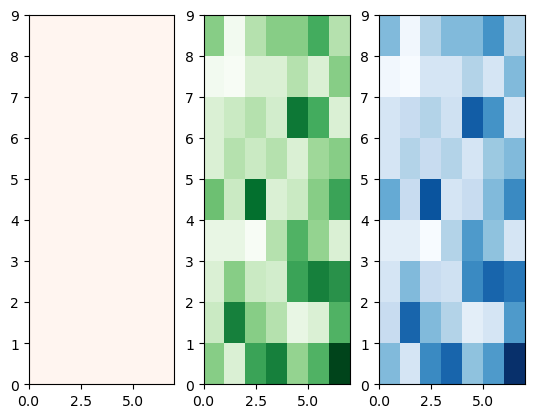

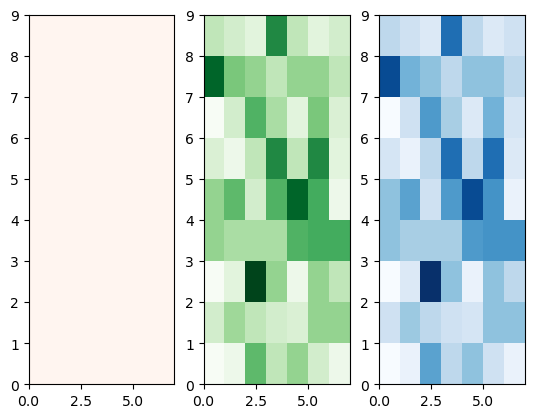

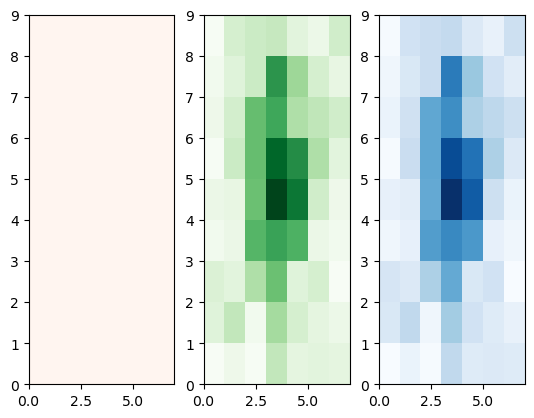

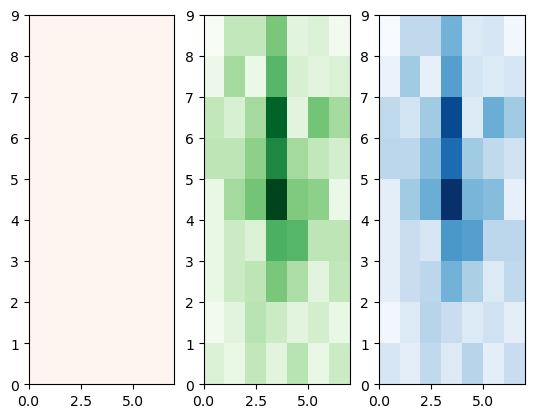

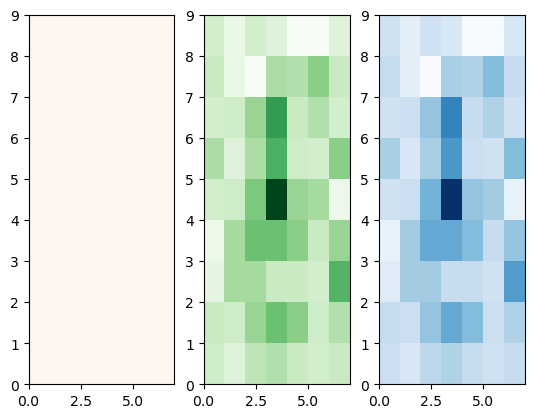

In [22]:
for image in state_list[0]:
    plot_image(image)

# Единицы

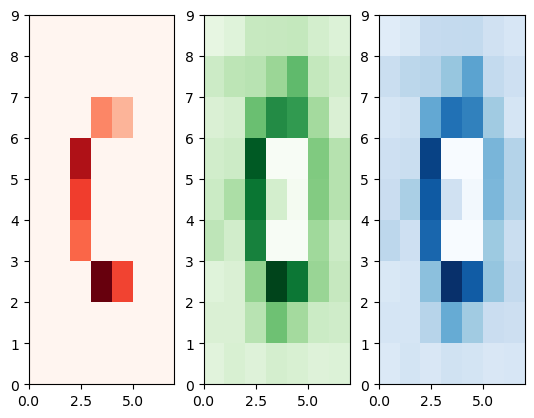

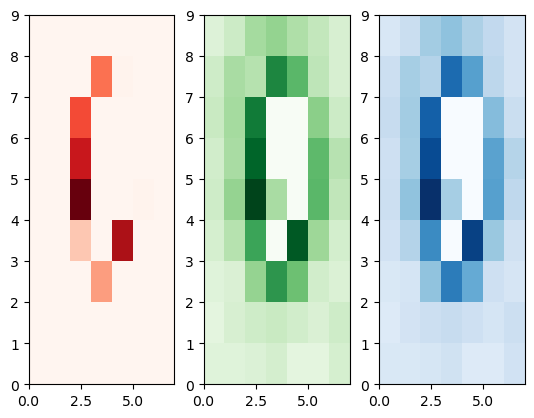

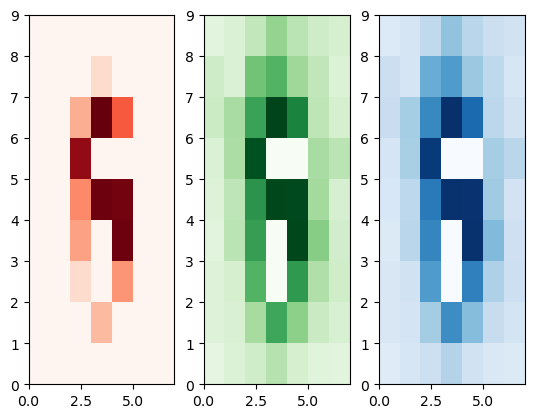

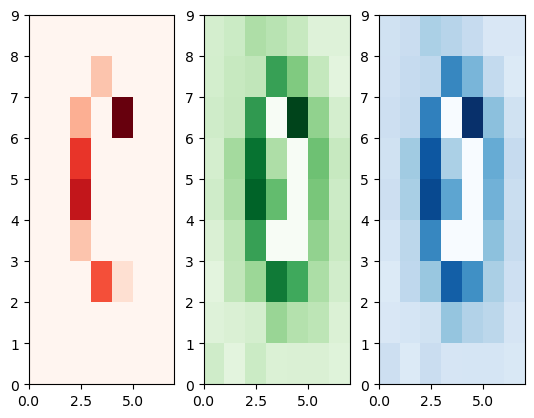

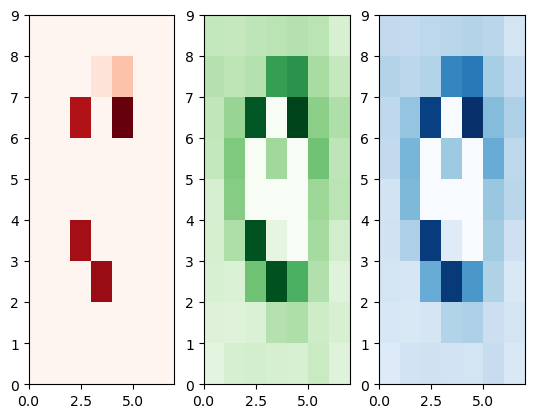

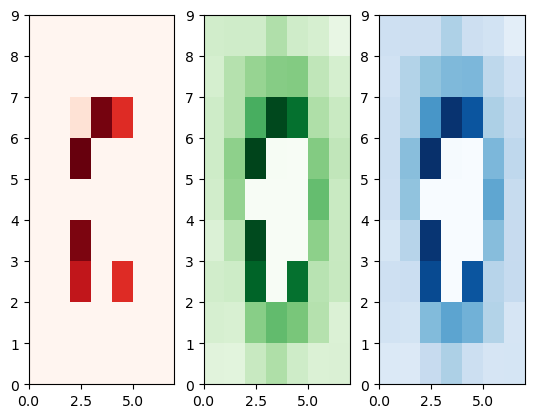

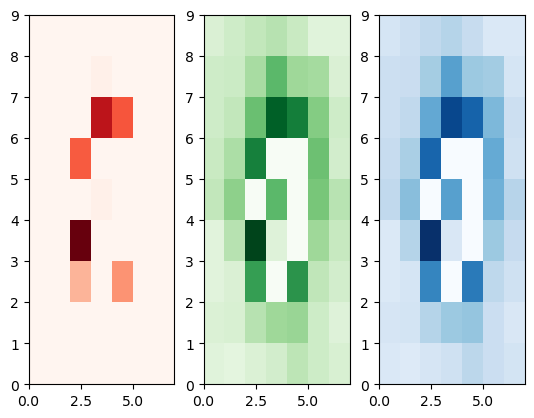

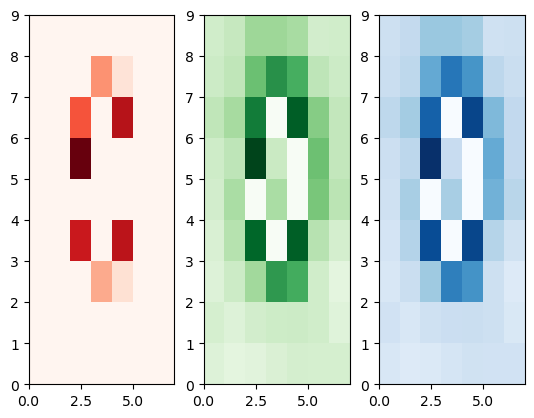

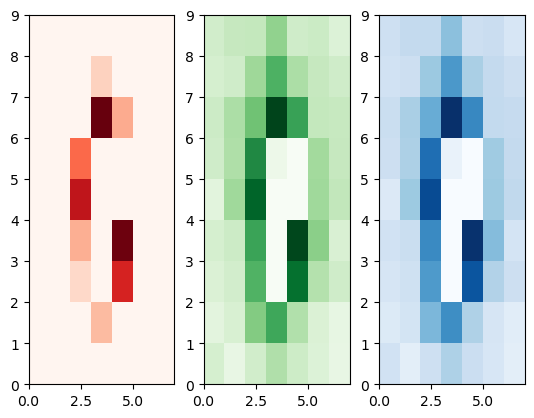

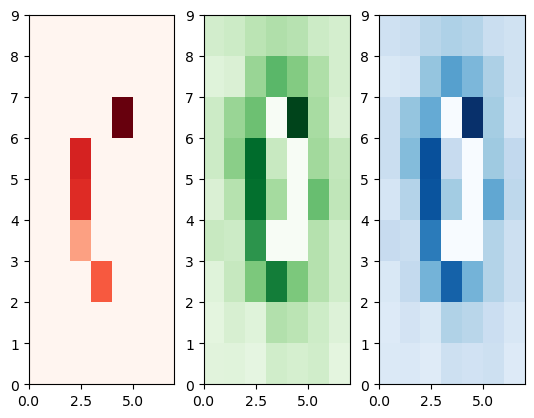

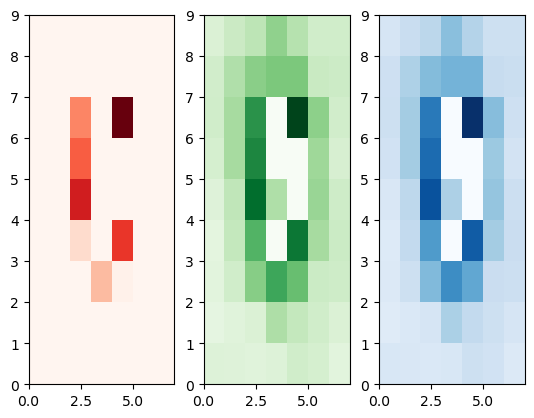

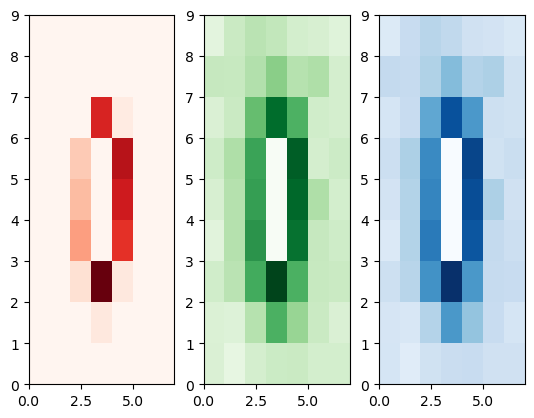

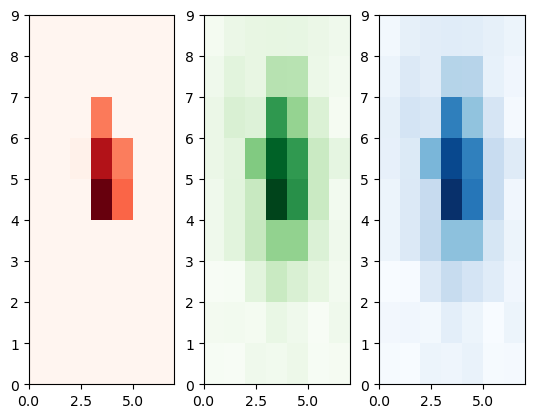

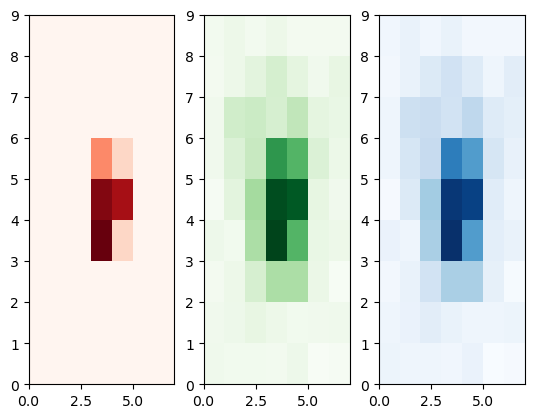

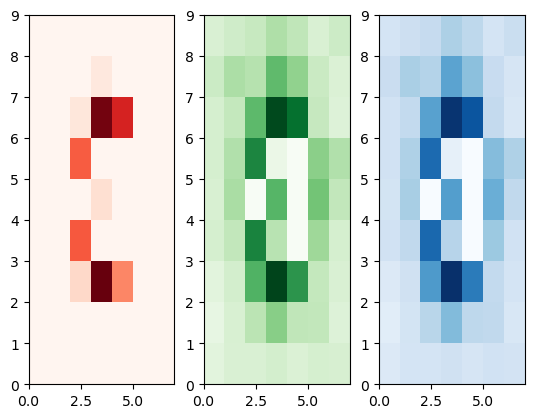

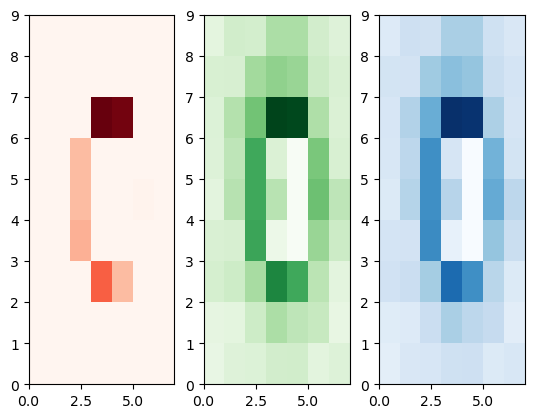

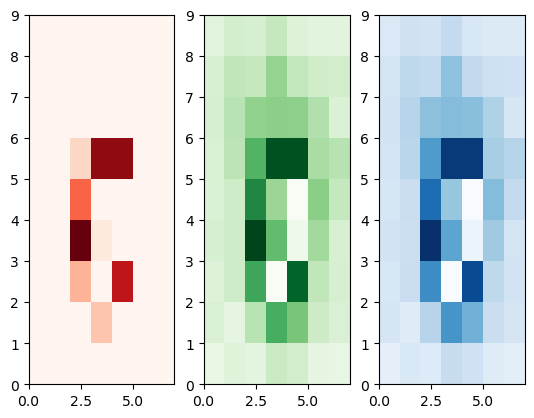

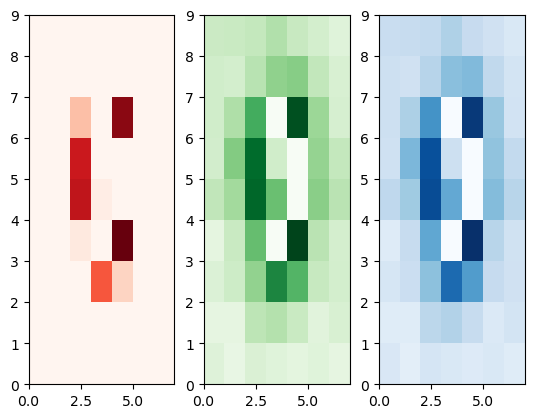

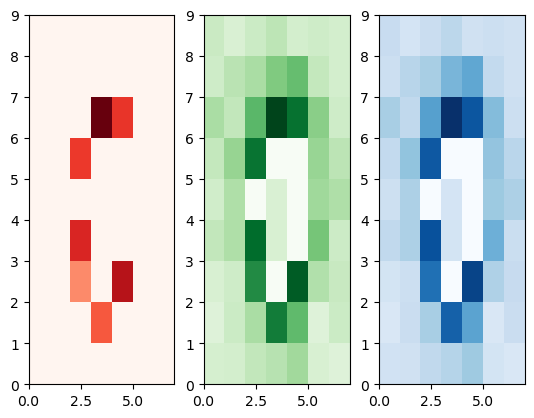

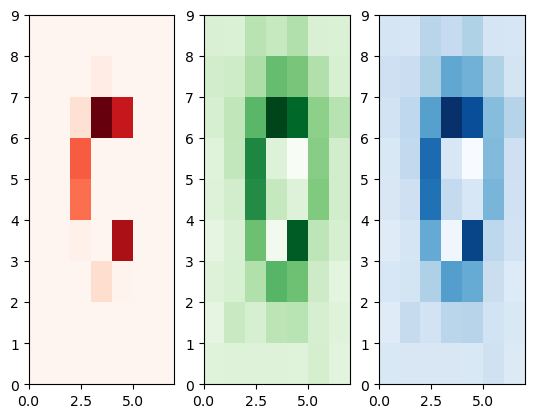

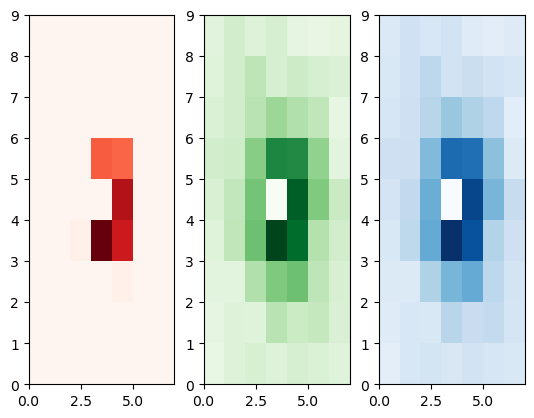

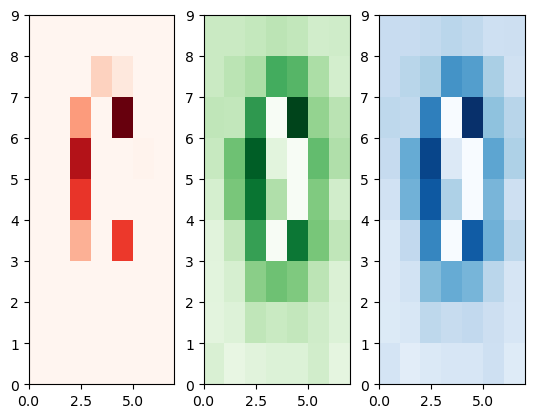

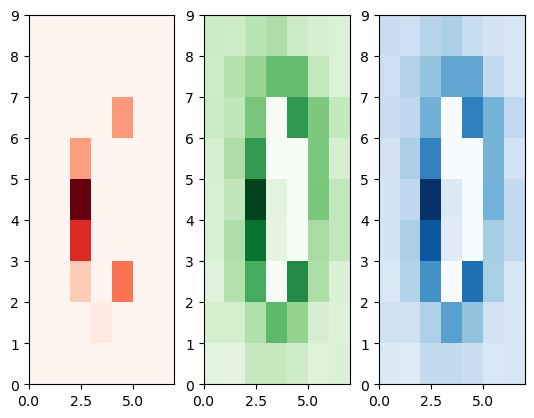

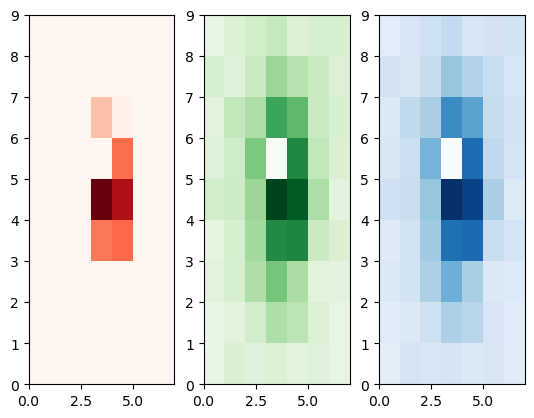

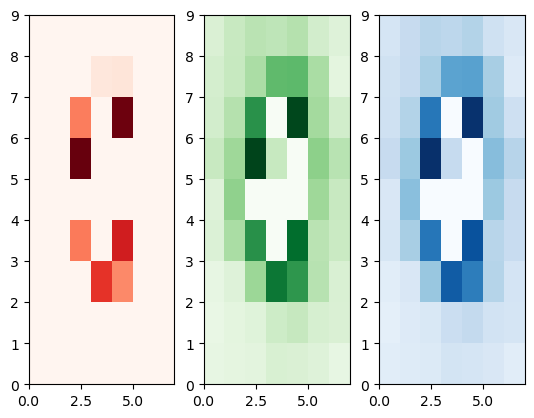

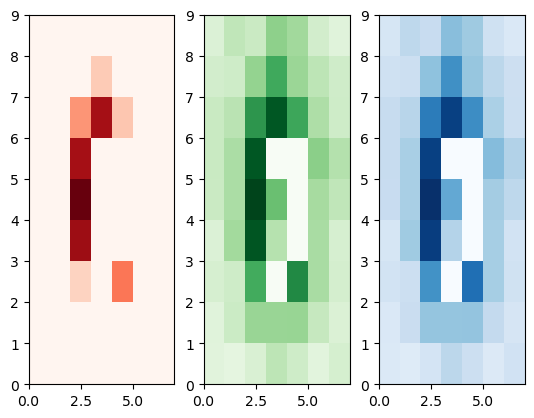

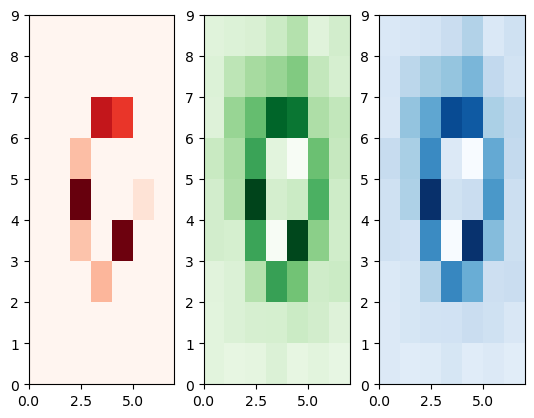

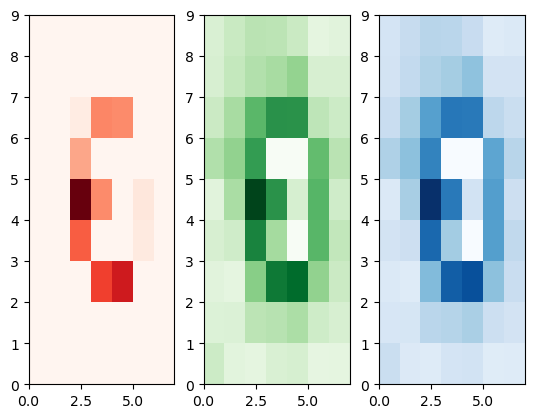

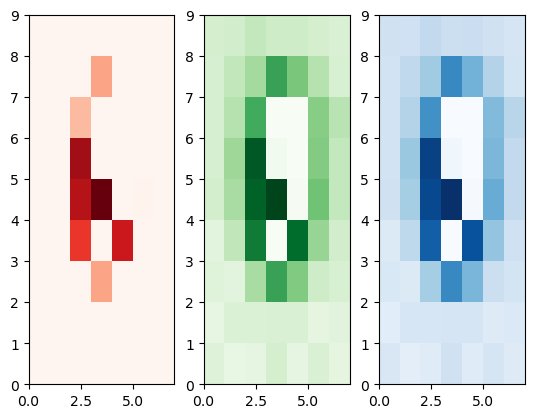

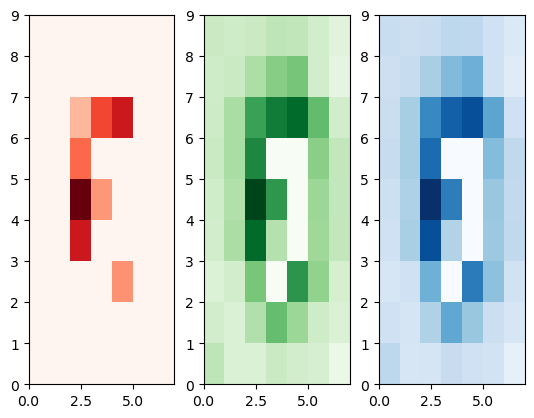

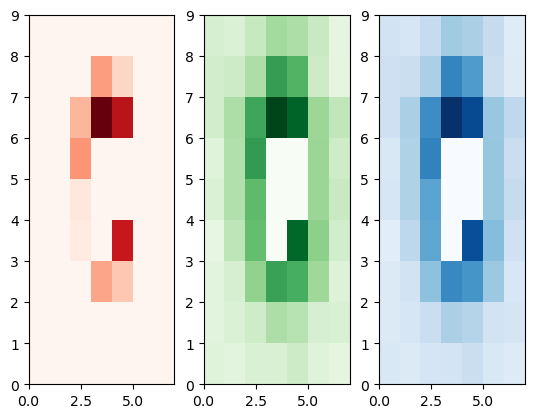

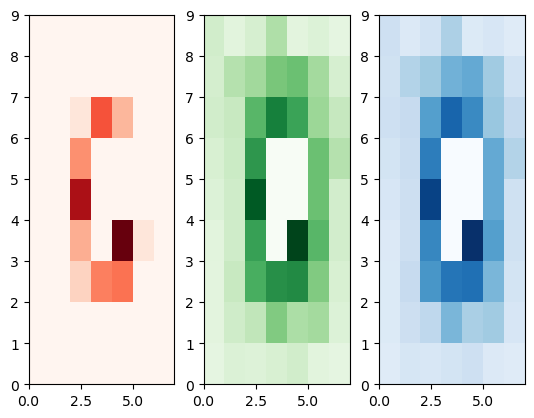

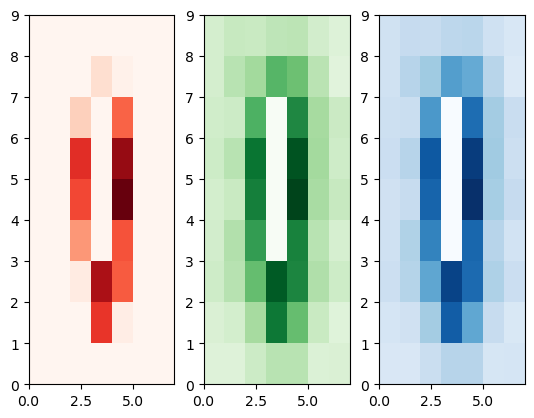

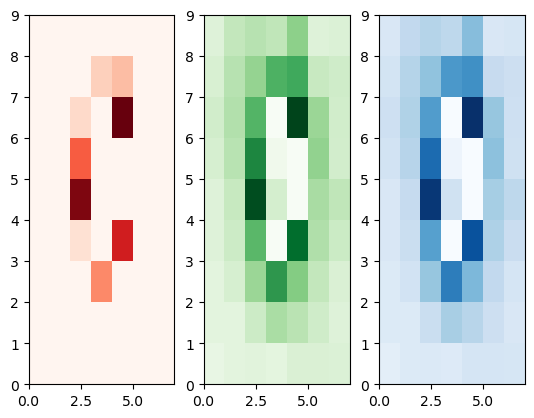

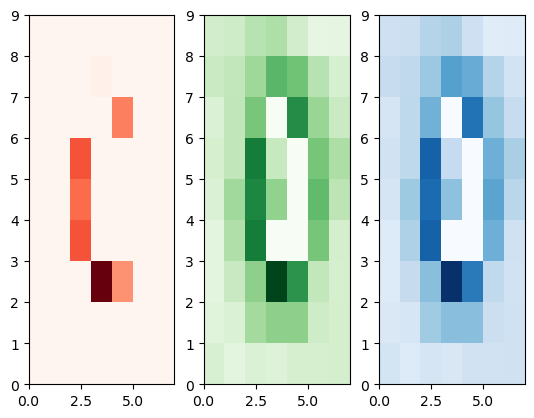

In [23]:
for image in state_list[1]:
    plot_image(image)

# Наивный подход

In [56]:
for state, images in enumerate(state_list):
    av_arr = np.average(images[:, :, :, 0], axis=(1, 2))
    print(state, np.min(av_arr), np.max(av_arr))

0 0.0 0.0
1 9.0 28.095238095238095


In [57]:
def get_single_qubit_im(filename, i):
    im_path = root + filename
    im = iio.imread(im_path)
    x_center = x_centers[i-1]
    y_center = y_centers[i-1]
    im_single = im[y_center-y_span:y_center + y_span+1, x_center-x_span:x_center + x_span+1]
    return im_single

In [73]:
threshold = 4.5
df_res = pd.DataFrame(columns=df_pred.columns)
for im_path in glob.glob(root + "*.png"):
    row = pd.DataFrame()
    im = iio.imread(im_path)
    row.insert(0, "Filename", [im_path[len(root):]])
    
    for i in range(4):
        x_center = x_centers[i]
        y_center = y_centers[i]
        x_list = np.arange(x_center-x_span, x_center + x_span+1)
        y_list = np.arange(y_center-y_span, y_center + y_span+1)
        im_single = im[y_center-y_span:y_center + y_span+1, x_center-x_span:x_center + x_span+1]
        if np.average(im_single[:, :, 0]) > threshold:
            state = 1
        else:
            state = 0
            
        row.insert(0, "Qubit " + str(i+1) + " state", [state])
        # print(row)
    df_res = pd.concat([df_res, row])
df_res.reset_index(inplace=True)
df_res.drop(["index"], inplace=True, axis=1)        

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,ada857de-c646-4e71-ba35-eb69cd4ae1c2.png,0,1,0,1
1,43ae79ec-569e-48e2-b5da-e33f423311d8.png,1,0,0,1
2,f26206f6-817c-4f04-b1f5-a70d02fd301f.png,1,1,0,1
3,a8319017-ecb7-456d-83c6-2c57bdddf52f.png,1,1,1,0
4,f228962a-2f34-4d6f-b016-1b3482c006c3.png,1,1,1,0
...,...,...,...,...,...
1015,fc24a220-e09e-46de-a097-826b620d63f9.png,1,1,0,1
1016,da63f25b-b65e-40f7-8a6b-e83fdbfc5e17.png,1,1,0,1
1017,888d2e1e-e5ea-40ae-afe9-243c45ed9544.png,1,1,0,1
1018,f37c4cc2-426f-4013-9243-72b8eb2637c2.png,0,1,0,1


In [74]:
threshold_df = df_res

# Классическое машинное обучение

In [25]:
def split_images_df(df):
    res = None
    for qubit_num in range(1, 5):
        temp = df.iloc[:, [0, qubit_num]]
        temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
        temp = temp.rename(columns={'Qubit ' + str(qubit_num) + ' state':'Qubit state'})

        res = pd.concat([res, temp])
    res = res.reset_index()
    # res.drop(["index"], inplace=True, axis=1)
    return res

In [26]:
def back_to_orig_df(df):
    res = pd.DataFrame(columns=df_pred.columns)
    for index, filename, state, qubit_num in zip(df["index"], df["Filename"], df["Qubit state"], df["Qubit num"]):
        res.loc[index, "index"] = index
        res.loc[index, "Filename"] = filename
        res.loc[index, "Qubit {0} state".format(qubit_num)] = state
            
    res.drop(["index"], inplace=True, axis=1)
    return res

In [27]:
import sklearn as sk 
from sklearn import svm 
import pandas as pd 
import os 

In [28]:
zero_ims = state_list[0]
one_ims = state_list[1]
 
for i in range(len(zero_ims)):
    zero_ims[i] = zero_ims[i].ravel()
for i in range(len(one_ims)):
    one_ims[i] = one_ims[i].ravel()

zero_ans = np.zeros(len(zero_ims))
one_ans = np.ones(len(one_ims))

X = np.concatenate((zero_ims, one_ims), axis=0)
y = np.concatenate((zero_ans, one_ans), axis=0)

In [29]:
SVM = svm.LinearSVC(max_iter=1200000) 
SVM.fit(X, y)

/Users/Lazemir/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=1200000)

In [30]:
X_test = []
for im_path in glob.glob(root + "*.png"):

    im = iio.imread(im_path)
    
    for i in range(4):
        x_center = x_centers[i]
        y_center = y_centers[i]
        x_list = np.arange(x_center-x_span, x_center + x_span+1)
        y_list = np.arange(y_center-y_span, y_center + y_span+1)
        im_single = im[y_center-y_span:y_center + y_span+1, x_center-x_span:x_center + x_span+1]
        
        im_raveled = im_single.ravel()
        X_test.append(im_raveled)
X_test = np.asarray(X_test)

In [31]:
y_test = SVM.predict(X_test)

In [32]:
y_test

array([0., 1., 0., ..., 1., 1., 0.])

## Better 

In [49]:
df_pred_transformed = split_images_df(df_pred)
X = []
for filename, qubit_num in zip(df_pred_transformed["Filename"], df_pred_transformed["Qubit num"]):
    X.append(get_single_qubit_im(filename, qubit_num).ravel())
y = df_pred_transformed["Qubit state"]

SVM = svm.LinearSVC(max_iter=1200000) 
SVM.fit(X, y)

/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to

LinearSVC(max_iter=1200000)

In [51]:
df_test = pd.DataFrame(columns=df_pred.columns)
for index, im_path in enumerate(glob.glob(root + "*.png")):
    df_test.loc[index, "Filename"] = im_path[len(root):]
df_test_transformed = split_images_df(df_test)

X = []
for filename, qubit_num in zip(df_test_transformed["Filename"], df_test_transformed["Qubit num"]):
    X.append(get_single_qubit_im(filename, qubit_num).ravel())

y = SVM.predict(X)
df_test_transformed["Qubit state"] = y
res_df = back_to_orig_df(df_test_transformed)

/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
/var/folders/kh/8hr0zdqx695_pv3b5hg32_w40000gp/T/ipykernel_20131/825338727.py:5: SettingWithCopyWarning: 
A value is trying to

In [87]:
dir(SVM)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'loss',
 'm

In [53]:
res_df

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,ada857de-c646-4e71-ba35-eb69cd4ae1c2.png,0,1,0,1
1,43ae79ec-569e-48e2-b5da-e33f423311d8.png,1,0,0,1
2,f26206f6-817c-4f04-b1f5-a70d02fd301f.png,1,1,0,1
3,a8319017-ecb7-456d-83c6-2c57bdddf52f.png,1,1,1,0
4,f228962a-2f34-4d6f-b016-1b3482c006c3.png,1,1,1,0
...,...,...,...,...,...
1015,fc24a220-e09e-46de-a097-826b620d63f9.png,1,1,0,1
1016,da63f25b-b65e-40f7-8a6b-e83fdbfc5e17.png,1,1,0,1
1017,888d2e1e-e5ea-40ae-afe9-243c45ed9544.png,1,1,0,1
1018,f37c4cc2-426f-4013-9243-72b8eb2637c2.png,0,1,0,1


In [62]:
CML_df = res_df

In [ ]:
Classic_ML_df_test

In [ ]:

transformed_df = split_images_df(Classic_ML_df_test)
for i, filename in enumerate(transformed_df["Filename"]):
    im_single = get_single_qubit_im(filename)
    

In [ ]:
a = split_images_df(Classic_ML_df_test)
a

In [ ]:
back_to_orig_df(a)

# Сравнение

In [76]:
threshold_df

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,ada857de-c646-4e71-ba35-eb69cd4ae1c2.png,0,1,0,1
1,43ae79ec-569e-48e2-b5da-e33f423311d8.png,1,0,0,1
2,f26206f6-817c-4f04-b1f5-a70d02fd301f.png,1,1,0,1
3,a8319017-ecb7-456d-83c6-2c57bdddf52f.png,1,1,1,0
4,f228962a-2f34-4d6f-b016-1b3482c006c3.png,1,1,1,0
...,...,...,...,...,...
1015,fc24a220-e09e-46de-a097-826b620d63f9.png,1,1,0,1
1016,da63f25b-b65e-40f7-8a6b-e83fdbfc5e17.png,1,1,0,1
1017,888d2e1e-e5ea-40ae-afe9-243c45ed9544.png,1,1,0,1
1018,f37c4cc2-426f-4013-9243-72b8eb2637c2.png,0,1,0,1


In [75]:
CML_df

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,ada857de-c646-4e71-ba35-eb69cd4ae1c2.png,0,1,0,1
1,43ae79ec-569e-48e2-b5da-e33f423311d8.png,1,0,0,1
2,f26206f6-817c-4f04-b1f5-a70d02fd301f.png,1,1,0,1
3,a8319017-ecb7-456d-83c6-2c57bdddf52f.png,1,1,1,0
4,f228962a-2f34-4d6f-b016-1b3482c006c3.png,1,1,1,0
...,...,...,...,...,...
1015,fc24a220-e09e-46de-a097-826b620d63f9.png,1,1,0,1
1016,da63f25b-b65e-40f7-8a6b-e83fdbfc5e17.png,1,1,0,1
1017,888d2e1e-e5ea-40ae-afe9-243c45ed9544.png,1,1,0,1
1018,f37c4cc2-426f-4013-9243-72b8eb2637c2.png,0,1,0,1


In [86]:
CML_df[CML_df!=threshold_df].describe()

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
count,0,3,10,3,3
unique,0,1,2,2,1
top,NaN,0,0,0,0
freq,NaN,3,9,2,3
